# 1 EDA (Exploratory Data Analysis)

## 1.1 EDA data description
### Visualization of data relationships, data types, null and NaN values, duplicates, and unique values present in each column, along with descriptive insights.
### Obs.: The **orders** table has the column **dias_since_prior_order**, which is documented with the name **dias_since_prior** in the task pdf, it will be considered the official name present in the table and not in the .pdf doc

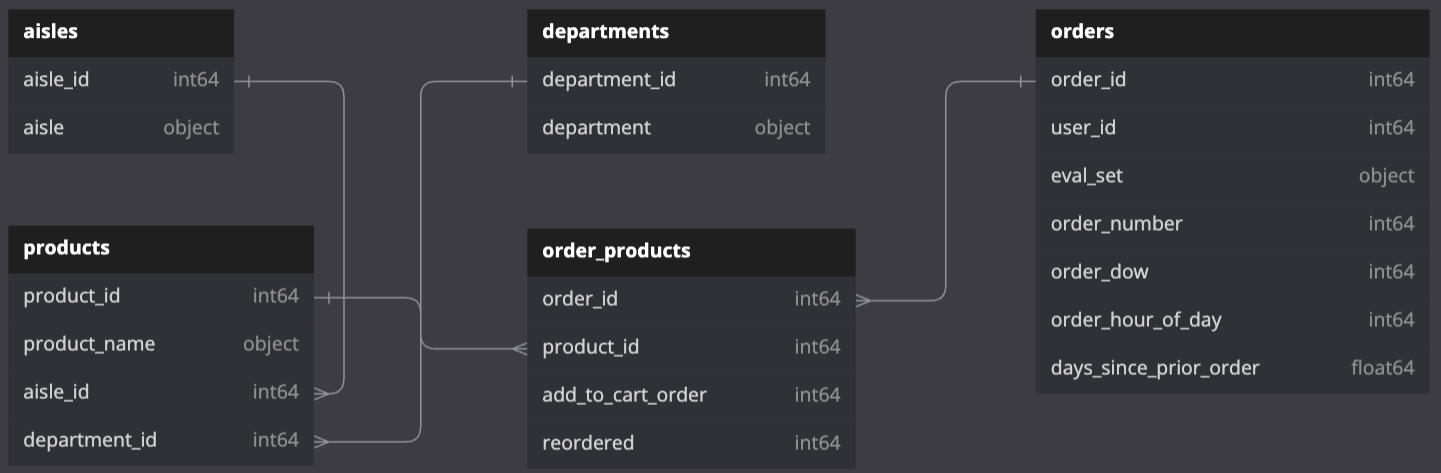

In [2]:
from IPython.display import display, Image
path_img = '/Users/marcobispo/Documents/Bees-Data-Challenge/data_schema.png'
display(Image(filename=path_img))

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
def read_multiple_csv(file_paths, names):
    if len(file_paths) != len(names):
        raise ValueError("The length of file_paths and names must be the same.")
    dataframes = {}
    for file_path, name in zip(file_paths, names):
        dataframes[name] = pd.read_csv(file_path)
    return dataframes
file_path = '/Users/marcobispo/Documents/Bees-Data-Challenge/Data-Challenge-V/online-shopping-dataset/'
file_paths = [file_path+'aisles.csv',
                file_path+'departments.csv',
                file_path+'order_products.csv',
                file_path+'orders.csv',
                file_path+'products.csv']
names = ['aisles', 'departments', 'order_products','orders','products']
dfs = read_multiple_csv(file_paths, names)
import pandas as pd
dict_quality_data = {
    'df_name': [],
    'column_name': [],
    'column_type': [],
    'NaN': [],
    'null': [],
    'duplicates':[],
    'uniques':[],
    'size':[],
    'describe':[]
}
dict_describe = {
    'aisles':{
        'aisle_id':'Uniquely identifies each aisle',
        'aisle':'Contains the name of the aisle'
    },
    'departments':{
        'department_id': 'Provides a unique identifier for each department',
        'department': 'Displays the name of the department'
    },
    'order_products':{
        'order_id':'Serves as a foreign key, linking to the unique order identifier',
        'product_id':'Functions as a foreign key, connecting to the unique product identifier',
        'add_to_cart_order': 'Reflects the order in which each product was added to the shopping cart',
        'reordered': 'Takes a value of 1 if the product has been ordered by the same user in the past, or 0 if not'
    },
    'orders':{
        'order_id': 'Uniquely identifies each order',
        'user_id': 'Identifies the customer associated with the order',
        'eval_set': 'Denotes the category to which this order belongs (refer to the SET descriptions below)'
            'The "SET" variable corresponds to one of two evaluation sets described below:'
            '■ "prior": Encompasses orders that occurred before the user\'s most recent order (approximately 3.2 million orders).'
            '■ "train": Comprises the training data supplied to participants (around 131,000 orders).',
        'order_number': "Represents the sequence number of the order for a user, where 1'denotes the first order and 'n' indicates the nth order",
        'order_dow': 'Indicates the day of the week when the order was placed',
        'order_hour_of_day': 'Specifies the hour at which the order was initiated',
        'days_since_prior_order': "Records the number of days that have elapsed since the user's previous order, capped at 30 days (with 'NAs' for the first order)"
        #days_since_prior:
    },
    'products':{
        'product_id': 'Serves as a unique identifier for each product',
        'product_name': 'Provides the name of the product',
        'aisle_id': 'Acts as a reference key for the aisle associated with the product',
        'department_id': 'Acts as a reference key for the department in which the product belongs'
    }
}
for name_df, df in dfs.items():
    for col in df.columns:
        series = df[col]
        n_nan = series.isna().sum()
        n_null = series.isnull().sum()
        duplicates = series.duplicated().sum()
        uniques = series.nunique()
        size = len(series)
        dict_quality_data['df_name'].append(name_df)
        dict_quality_data['column_name'].append(col)
        dict_quality_data['column_type'].append(series.dtype)
        dict_quality_data['NaN'].append(n_nan)
        dict_quality_data['null'].append(n_null)
        dict_quality_data['duplicates'].append(duplicates)
        dict_quality_data['uniques'].append(uniques)
        dict_quality_data['size'].append(size)
        dict_quality_data['describe'].append(dict_describe[name_df][col])
df_quality_data = pd.DataFrame(dict_quality_data)
display(df_quality_data)

,df_name,column_name,column_type,NaN,null,duplicates,uniques,size,describe
0,aisles,aisle_id,int64,0,0,0,134,134,Uniquely identifies each aisle
1,aisles,aisle,object,0,0,0,134,134,Contains the name of the aisle
2,departments,department_id,int64,0,0,0,21,21,Provides a unique identifier for each department
3,departments,department,object,0,0,0,21,21,Displays the name of the department
4,order_products,order_id,int64,0,0,30473023,3346083,33819106,"Serves as a foreign key, linking to the unique order identifier"
5,order_products,product_id,int64,0,0,33769421,49685,33819106,"Functions as a foreign key, connecting to the unique product identifier"
6,order_products,add_to_cart_order,int64,0,0,33818961,145,33819106,Reflects the order in which each product was added to the shopping cart
7,order_products,reordered,int64,0,0,33819104,2,33819106,"Takes a value of 1 if the product has been ordered by the same user in the past, or 0 if not"
8,orders,order_id,int64,0,0,0,3346083,3346083,Uniquely identifies each order
9,orders,user_id,int64,0,0,3139874,206209,3346083,Identifies the customer associated with the order


In [3]:
for name_df, df in dfs.items():
    print(name_df)
    display(df.head(2))

aisles


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses


departments


,department_id,department
0,1,frozen
1,2,other


order_products


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1


orders


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


products


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


## 1.2 EDA data check
### Quick check to verify if the data descriptions match what is actually present in the dataframe otherwise, cleaning will be necessary.
### The description perfectly matches the data being analyzed however, the count of days of the week is starting from zero, for hours it makes sense, but for days not so much, but 7 values ​​are present within the list

In [33]:
reordered = dfs['order_products']['reordered'].unique().tolist()
reordered.sort()
print("dfs['order_products']['reordered']")
print(reordered)
order_number = dfs['orders']['order_number'].unique().tolist()
order_number.sort()
print("dfs['orders']['order_number']")
print(order_number)
order_dow = dfs['orders']['order_dow'].unique().tolist()
order_dow.sort()
print("dfs['orders']['order_dow']")
print(order_dow)
order_hour_of_day = dfs['orders']['order_hour_of_day'].unique().tolist()
order_hour_of_day.sort()
print("dfs['orders']['order_hour_of_day']")
print(order_hour_of_day)
days_since_prior_order = dfs['orders']['days_since_prior_order'].unique().tolist()
days_since_prior_order.sort()
print("dfs['orders']['days_since_prior_order']")
print(days_since_prior_order)

dfs['order_products']['reordered']
[0, 1]
dfs['orders']['order_number']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
dfs['orders']['order_dow']
[0, 1, 2, 3, 4, 5, 6]
dfs['orders']['order_hour_of_day']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
dfs['orders']['days_since_prior_order']
[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]


## 1.3 Data Visualization:
### Which product had the biggest sales and reordered?
#### Bananas and Bananas
### Which aisle had the biggest sales and reordered?
#### Fresh vegetables and fresh fruits
### Which department had the highest sales and reordered?
#### produce anda produce
### Which user ID had the highest sales and reordered?
#### 129928 and 201268
### Which days_since_prior_order of the week sell the most?
### 7
### Which order_dow of the month sell the most?
#### Friday by logic (5)
### Which order_hour_of_day sell the most?
### 10 hours
#### Note: eval_set equals prior that mens the clients really buy the products ?	

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df_order_products_products = pd.merge(dfs['order_products'], dfs['products'], on='product_id', how='left')
df_order_products_products_aisles = pd.merge(df_order_products_products, dfs['aisles'], on='aisle_id', how='left')
df_order_products_products_aisles_departments = pd.merge(df_order_products_products_aisles, dfs['departments'], on='department_id', how='left')
df_order_products_products_aisles_departments_orders = pd.merge(df_order_products_products_aisles_departments, dfs['orders'], on='order_id', how='left')
df_visualization = df_order_products_products_aisles_departments_orders[["department","add_to_cart_order","reordered","product_name","aisle","eval_set","order_dow","order_hour_of_day","days_since_prior_order","user_id"]]
display(df_visualization)

,department,add_to_cart_order,reordered,product_name,aisle,eval_set,order_dow,order_hour_of_day,days_since_prior_order,user_id
0,dairy eggs,1,1,Organic Egg Whites,eggs,prior,5,9,8.0,202279
1,produce,2,1,Michigan Organic Kale,fresh vegetables,prior,5,9,8.0,202279
2,pantry,3,0,Garlic Powder,spices seasonings,prior,5,9,8.0,202279
3,pantry,4,1,Coconut Butter,oils vinegars,prior,5,9,8.0,202279
4,pantry,5,0,Natural Sweetener,baking ingredients,prior,5,9,8.0,202279
...,...,...,...,...,...,...,...,...,...,...
33819101,beverages,3,1,Natural Artesian Water,water seltzer sparkling water,train,0,10,4.0,169679
33819102,deli,4,1,Twice Baked Potatoes,prepared meals,train,0,10,4.0,169679
33819103,dairy eggs,1,1,Organic Unsweetened Almond Milk,soy lactosefree,train,6,10,8.0,139822
33819104,pantry,2,1,Creamy Peanut Butter,spreads,train,6,10,8.0,139822


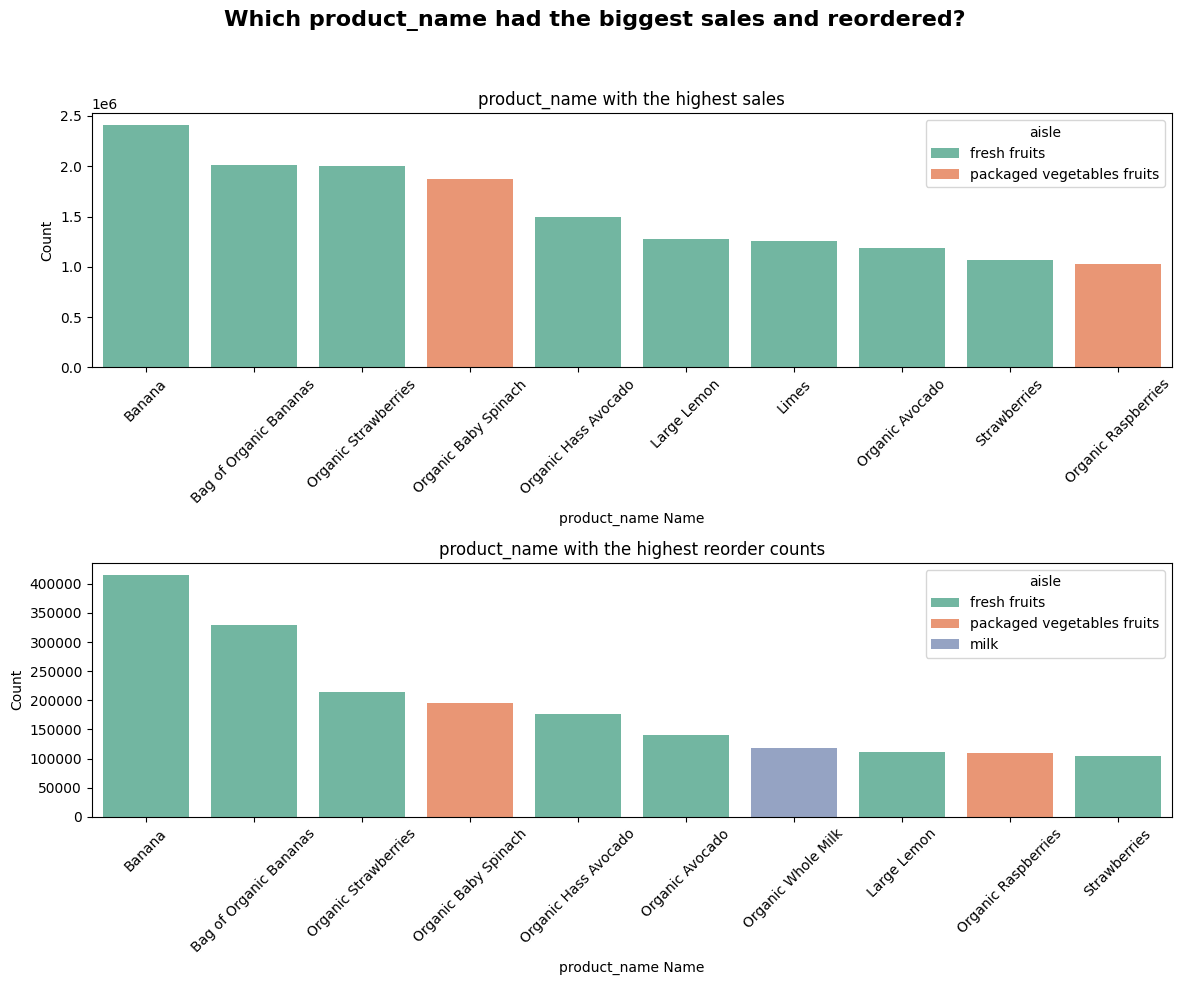

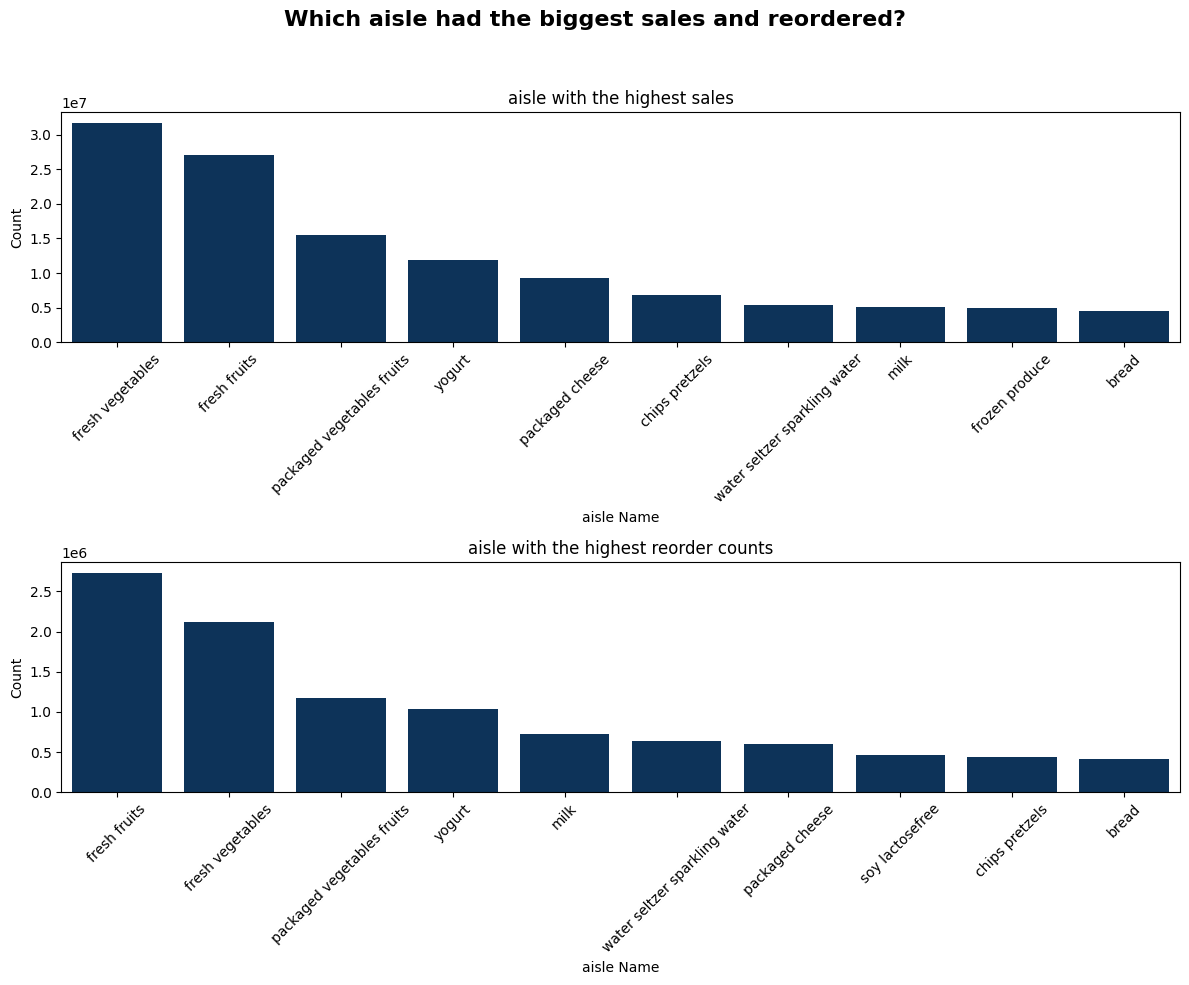

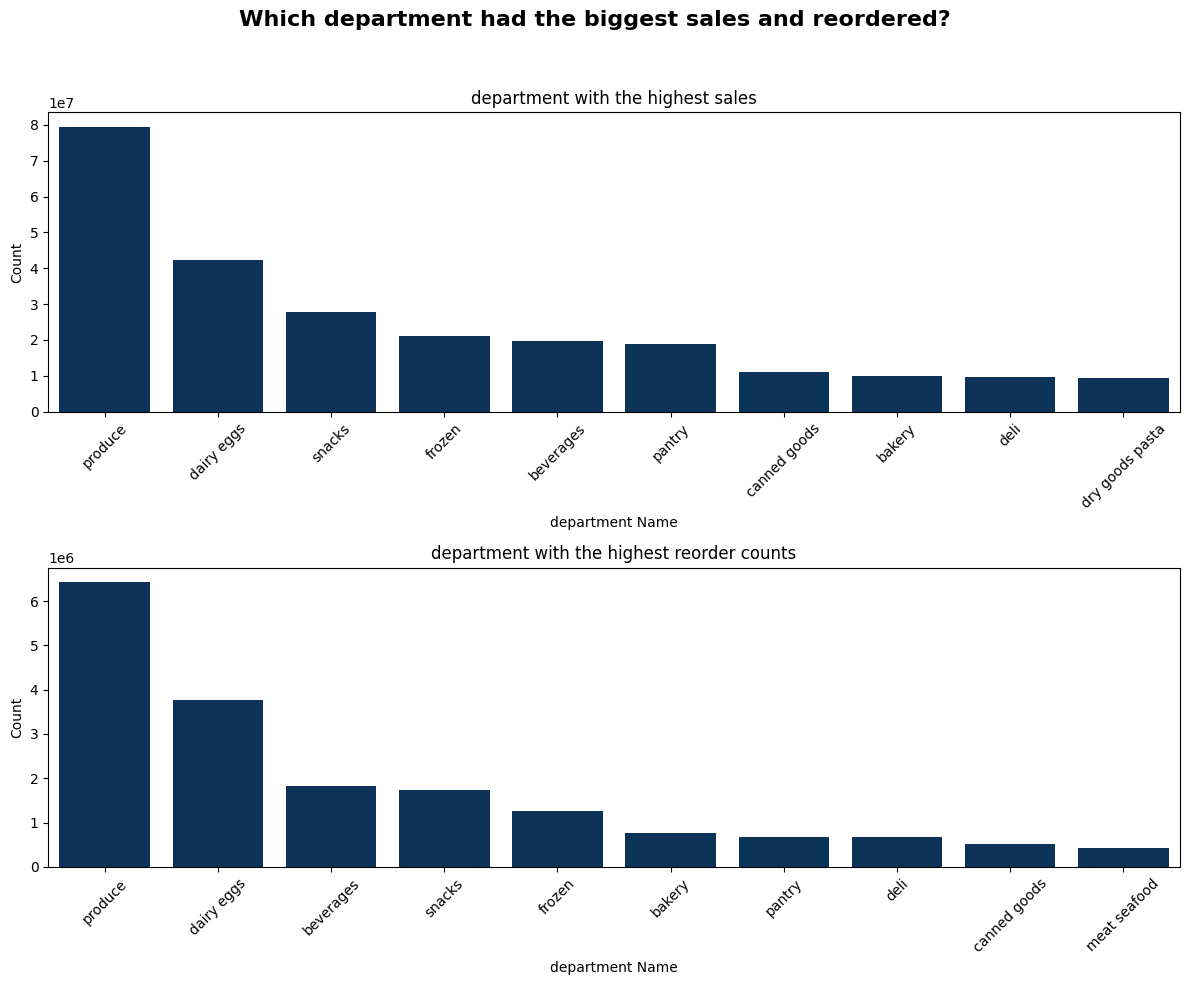

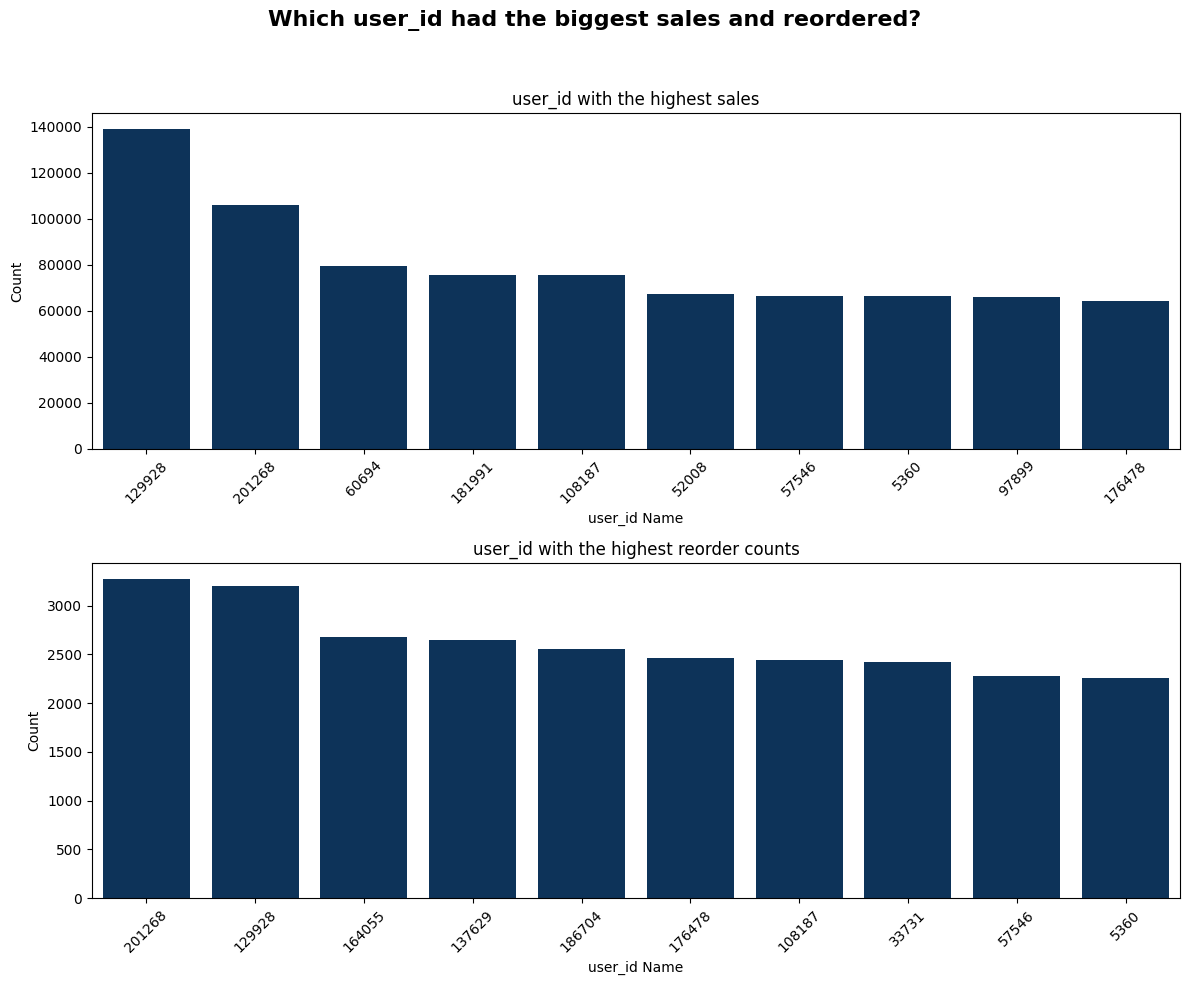

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def bar_plot_which(x, y1, y2, df, subtitle1, subtitle2, title, hue=None):
    plt.figure(figsize=(12, 10))
    

    plt.subplot(2, 1, 1)
    if hue:
        df_visualization_q2_1 = df.groupby([x,hue])[y1].sum().reset_index()
    else:
        df_visualization_q2_1 = df.groupby([x])[y1].sum().reset_index()
    df_visualization_q2_1 = df_visualization_q2_1.sort_values(by=y1, ascending=False).iloc[:10]
    if hue:
        ax1 = sns.barplot(x=x, y=y1, hue=hue, data=df_visualization_q2_1, dodge=False, palette='Set2', order=df_visualization_q2_1[x])
    else:
        ax1 = sns.barplot(x=x, y=y1, data=df_visualization_q2_1, dodge=False, color='#003366', order=df_visualization_q2_1[x])
    ax1.set_title(subtitle1)
    ax1.set_xlabel(x + ' Name')
    ax1.set_ylabel('Count')
    ax1.set_xticks(range(len(df_visualization_q2_1)))
    ax1.set_xticklabels(df_visualization_q2_1[x], rotation=45)
    

    plt.subplot(2, 1, 2)
    if hue:
        df_visualization_q2_2 = df.groupby([x,hue])[y2].sum().reset_index()
    else:
        df_visualization_q2_2 = df.groupby([x])[y2].sum().reset_index()
    df_visualization_q2_2 = df_visualization_q2_2.sort_values(by=y2, ascending=False).iloc[:10]
    if hue:
        ax2 = sns.barplot(x=x, y=y2, hue=hue, data=df_visualization_q2_2, dodge=False, palette='Set2', order=df_visualization_q2_2[x])
    else:
        ax2 = sns.barplot(x=x, y=y2, data=df_visualization_q2_2, dodge=False, color='#003366', order=df_visualization_q2_2[x])
    ax2.set_title(subtitle2)
    ax2.set_xlabel(x + ' Name')
    ax2.set_ylabel('Count')
    ax2.set_xticks(range(len(df_visualization_q2_2)))
    ax2.set_xticklabels(df_visualization_q2_2[x], rotation=45)
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



x = 'product_name'
y1 = 'add_to_cart_order'
y2 = 'reordered'
hue = 'aisle'
subtitle1 = (f"{x} with the highest sales")
subtitle2 = (f"{x} with the highest reorder counts")
title = (f"Which {x} had the biggest sales and reordered?")
bar_plot_which(x, y1, y2, df_visualization, subtitle1, subtitle2, title, hue)

x = 'aisle'
y1 = 'add_to_cart_order'
y2 = 'reordered'
subtitle1 = (f"{x} with the highest sales")
subtitle2 = (f"{x} with the highest reorder counts")
title = (f"Which {x} had the biggest sales and reordered?")
bar_plot_which(x, y1, y2, df_visualization, subtitle1, subtitle2, title)

x = 'department'
y1 = 'add_to_cart_order'
y2 = 'reordered'
hue = 'aisle'
subtitle1 = (f"{x} with the highest sales")
subtitle2 = (f"{x} with the highest reorder counts")
title = (f"Which {x} had the biggest sales and reordered?")
bar_plot_which(x, y1, y2, df_visualization, subtitle1, subtitle2, title)

x = 'user_id'
y1 = 'add_to_cart_order'
y2 = 'reordered'
hue = 'aisle'
subtitle1 = (f"{x} with the highest sales")
subtitle2 = (f"{x} with the highest reorder counts")
title = (f"Which {x} had the biggest sales and reordered?")
bar_plot_which(x, y1, y2, df_visualization, subtitle1, subtitle2, title)

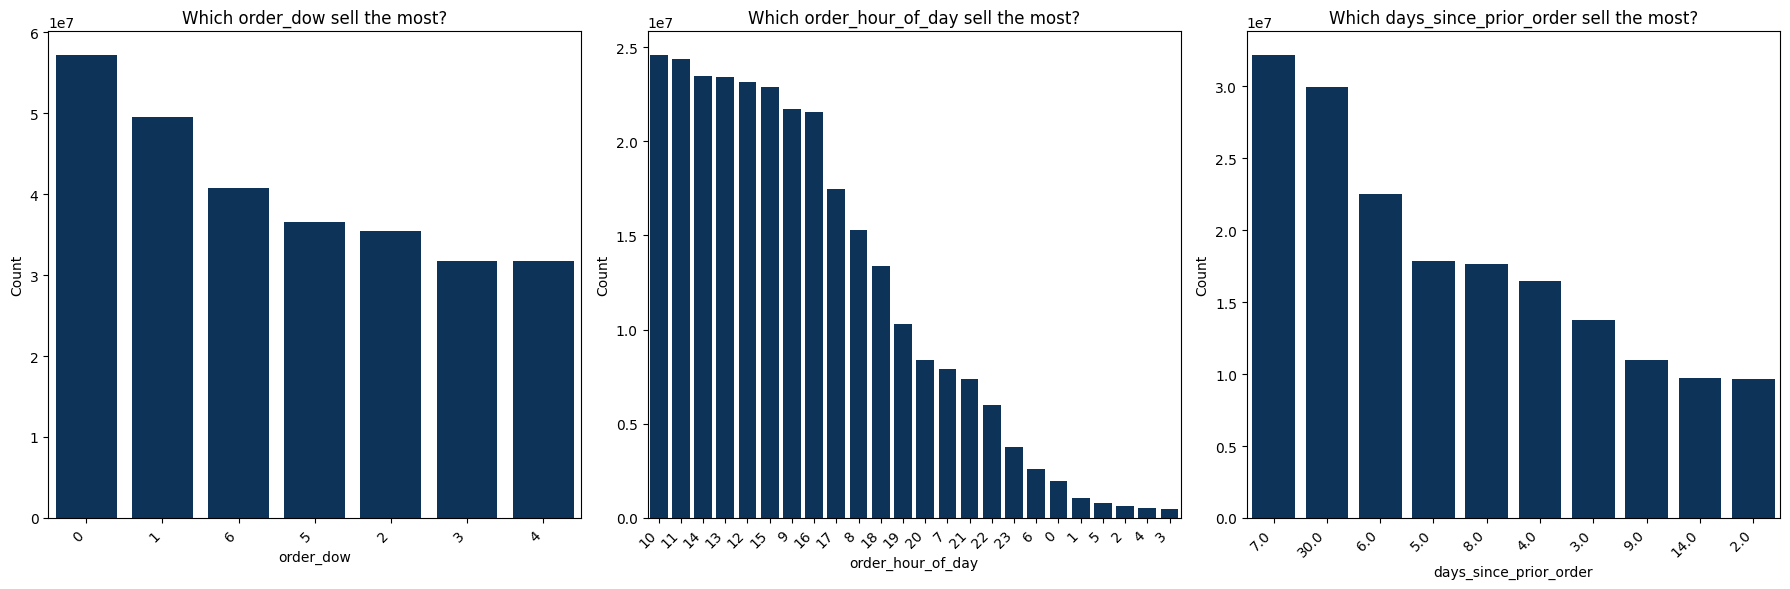

In [30]:
def bar_plot_which_time(x, y1, df, title, size, hue=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 10))
    
    if hue:
        df_agg = df.groupby([x, hue])[y1].sum().reset_index()
    else:
        df_agg = df.groupby(x)[y1].sum().reset_index()
    
    df_top = df_agg.sort_values(by=y1, ascending=False).iloc[:size]
    
    if hue:
        sns.barplot(x=x, y=y1, hue=hue, data=df_top, dodge=False, palette='Set2', order=df_top[x], ax=ax)
    else:
        sns.barplot(x=x, y=y1, data=df_top, dodge=False, color='#003366', order=df_top[x], ax=ax)
    
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel('Count')
    
    ax.set_xticks(range(len(df_top[x])))
    ax.set_xticklabels(df_top[x], rotation=45, ha='right')
    
    if hue:
        ax.legend(title=hue)
    
    plt.tight_layout()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

params = [
    {'x': 'order_dow', 'y1': 'add_to_cart_order', 'title': 'Which order_dow sell the most?', 'size': 10},
    {'x': 'order_hour_of_day', 'y1': 'add_to_cart_order', 'title': 'Which order_hour_of_day sell the most?', 'size': 24},
    {'x': 'days_since_prior_order', 'y1': 'add_to_cart_order', 'title': 'Which days_since_prior_order sell the most?', 'size': 10}
]

for i, param in enumerate(params):
    bar_plot_which_time(param['x'], param['y1'], df_visualization, param['title'], param['size'], ax=axes[i])

plt.tight_layout()
plt.show()


# 2 Statistical analysis
### Note: It is not possible to carry out poison studies due to the lack of the year of registration.
### Poisson is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if those events occur with a known constant average rate and regardless of the time since the last event, in which case product sales, I would suggest a study to increase sales probabilities using order_dow, order_hour_of_day, days_since_prior_order

## 2.1 Descriptive Statistics Statistical graphs

In [32]:
df_order_products_products_aisles_departments_orders

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,3421063,14233,3,1,Natural Artesian Water,115,7,water seltzer sparkling water,beverages,169679,train,30,0,10,4.0
33819102,3421063,35548,4,1,Twice Baked Potatoes,13,20,prepared meals,deli,169679,train,30,0,10,4.0
33819103,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs,139822,train,15,6,10,8.0
33819104,3421070,16953,2,1,Creamy Peanut Butter,88,13,spreads,pantry,139822,train,15,6,10,8.0


## 2.2 Inferential Statistics Hypothesis testing

## 2.3 Inferential Statistics Principal Component Analysis (PCA)

# 3 Customer Segmentation: 
#### Can you segment customers based on their ordering behavior, such as frequency, time of day, or days since prior order, to better understand their preferences and propose ways to optimize marketing strategies?

# 4 Inventory Management:
### Inventory Management: Implement a predictive model that estimates inventory levels
### for individual products across different departments and aisles, taking into consideration the day of the week and hour. Please note the following points:
### Note 1 - The model should be predictive, not a forecasting model.
### Note 2 - Explain how this predictive model can be applied to optimize stock levels and minimize waste.

# 5 Order Fulfillment (Bonus points): 
### How can we optimize the order fulfillment process, considering factors like the day of the week and time of day when most orders are placed, to ensure timely and efficient deliveries to customers while minimizing operational costs?

### Classificar os produtos em velocidade de compra, estudar as distribuidoras que tem mais fluxo e comparar com as de menores fluxo e estudar comportamentos

#  6 Given the brevity of this exercise:
### outline the additional work/action items you would take to solve this challenge if you were given 2 additional weeks to complete the assignment.